# Data visualize "Prepared Food" Supply amount by zip code
- We have to check supply amount by GPCFB as well.

In [16]:
# to read and visualize spatial data
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Preparing to draw the boundary

In [2]:
# df_bound is for boundary plotting
path = "./geo_data/tl_2021_us_county/tl_2021_us_county.shp" # from https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2021&layergroup=Counties+%28and+equivalent%29
df_bound = gpd.read_file(path)
df_bound = df_bound.to_crs("EPSG:4326")

# All US -> Only PA
df_bound = df_bound[df_bound["STATEFP"] == "42"]
# All PA -> Only the 11 counties
df_bound = df_bound[df_bound["NAME"].isin(["Allegheny", "Armstrong", "Beaver", "Butler", "Cambria", 
                                           "Fayette", "Greene", "Indiana", "Lawrence", "Somerset", "Washington"])]

## Import geo data
You need to select the geo-data for your regional unit.  
(e.g.) If you have data by **zip code**, you have to select geo-data for zip code.

Zip code data is large, so it may take some time to load.

In [3]:
# Geodata of PA by Zipcode
path = "./geo_data/tl_2021_us_zcta520/tl_2021_us_zcta520.shp"
df_geo = gpd.read_file(path)
df_geo = df_geo.to_crs("EPSG:4326")

In [4]:
# check
df_geo.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47236,47236,B5,G6350,S,1029067,0,+39.1517426,-085.7252769,"POLYGON ((-85.73410 39.15597, -85.72749 39.156..."
1,47870,47870,B5,G6350,S,8830,0,+39.3701518,-087.4735141,"POLYGON ((-87.47414 39.37016, -87.47409 39.370..."
2,47851,47851,B5,G6350,S,53547,0,+39.5735818,-087.2459626,"POLYGON ((-87.24770 39.57431, -87.24770 39.574..."
3,47337,47337,B5,G6350,S,303089,0,+39.8027537,-085.4372850,"POLYGON ((-85.44357 39.80328, -85.44346 39.803..."
4,47435,47435,B5,G6350,S,13302,0,+39.2657557,-086.2951577,"POLYGON ((-86.29592 39.26547, -86.29592 39.266..."


## Import data to be visualized
I made this data with "GPCFB_DistirbutePounds_Dataset.csv".   


In [5]:
# Read Supply data
df = gpd.read_file("./data/Ryo_GPCFB_DistirbutePounds_Dataset.csv") 

In [6]:
df.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,ProductQuantity,FAType,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef,field_22,geometry
0,134576,434282,926,GPCF2078-1,NULL,NULL,LC-DIST,LAWRENCE,1/3/2019 8:00,10760,...,40,06-Meals/Entrees/Soups,DRY,DEL NO FEE,Soup Chicken & Rice EZO,254,2 Purchased,OTHER,,None
1,134576,434282,926,GPCF2078-1,NULL,NULL,LC-DIST,LAWRENCE,1/3/2019 8:00,10760,...,16,24-Rice,DRY,DEL NO FEE,Rice White Long Grain,207.84,2 Purchased,OTHER,,None
2,134576,434282,926,GPCF2078-1,NULL,NULL,LC-DIST,LAWRENCE,1/3/2019 8:00,10760,...,24,21-Pasta,DRY,DEL NO FEE,Pasta Spaghetti,178.8,2 Purchased,OTHER,,None
3,134576,434282,926,GPCF2078-1,NULL,NULL,LC-DIST,LAWRENCE,1/3/2019 8:00,10760,...,20,06-Meals/Entrees/Soups,DRY,DEL NO FEE,Meal Ravioli w/Beef EZO,251.4,2 Purchased,OTHER,,None
4,134576,434282,926,GPCF2078-1,NULL,NULL,LC-DIST,LAWRENCE,1/3/2019 8:00,10760,...,20,27-Vegetables Canned/Frozen,DRY,DEL NO FEE,Vegetable Peas Sweet,203.8,2 Purchased,OTHER,,None


In [7]:
df.describe()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,ProductQuantity,FAType,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef,field_22,geometry
count,491870,491870,491870,491870,491870,491870,491870,491870,491870,491870,...,491870,491870,491870,491870,491870,491870,491870,491870,491870,0
unique,104193,104292,802,802,152,168,51,21,12156,18994,...,3016,724,35,12,2890,14122,1921,22,18,0
top,,0,867,PEAS1001-2,Pittsburgh,15206,PROG-FP,ALLEGHENY,ALLEGHENY,4,...,1,28-Produce,DRY,DEL,Bread/Bakery - Agency PU,0,1 Donated,RETAILWHSL,,NaN
freq,762,537,18116,18116,180321,32010,315259,358782,22193,2218,...,69367,62927,290572,203730,29049,359366,218371,121470,469712,NaN


In [8]:
# Checked rows with NULL zipcode
df[df["Zip"]=="NULL"].shape

(3712, 23)

In [9]:
df.shape

(491870, 23)

In [10]:
# cheked the percentage of rows deleted
# -> 0.75%
3712 / 491870

0.0075467094964116535

In [11]:
# Eliminate rows has "NULL" zipcode
df = df[df["Zip"]!="NULL"]

In [17]:
# Make a column based on conditions
# If the line is '31-Prepared and Perishable Food', it is set to 1.

conditions = [ df['FAType'] == '31-Prepared and Perishable Food' ]
choices = [1]

df['Prepared_food'] = np.select(conditions, choices, default=0) 

In [21]:
df[df['Prepared_food'] == 1].shape

(20382, 24)

In [22]:
# Make a blank column

df["PF_poundage"]=np.nan

In [23]:
df.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef,field_22,geometry,Prepared_food,PF_poundage
16,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Baking Meal Pancake Mix,178.8,2 Purchased,OTHER,,None,0,NaN
17,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Vegetable Tomatoes Diced LS,316.5,2 Purchased,OTHER,,None,0,NaN
18,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Dairy Milk 1% Shelf Stable,450.9,2 Purchased,OTHER,,None,0,NaN
19,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Juice Apple Juice,424.2,2 Purchased,OTHER,,None,0,NaN
20,134715,434421,1731,PCON2229-2,Confluence,15424,CHILD-WKEND,SOMERSET,1/24/2019 10:30,242,...,DRY,DEL NO FEE,Single Serve Snack Crispy Bites Cinnamon,45.44,2 Purchased,OTHER,,None,0,NaN


In [32]:
# Drop "ProductWeight" == ""
df = df.replace({'ProductWeight': {"": 0}})

In [33]:
# Caluculate Prepared Food Poundage
df = df.astype({'ProductWeight': float})
df["PF_poundage"] = df['ProductWeight'] * df['Prepared_food']

In [34]:
df.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef,field_22,geometry,Prepared_food,PF_poundage
16,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Baking Meal Pancake Mix,178.8,2 Purchased,OTHER,,None,0,0.0
17,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Vegetable Tomatoes Diced LS,316.5,2 Purchased,OTHER,,None,0,0.0
18,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Dairy Milk 1% Shelf Stable,450.9,2 Purchased,OTHER,,None,0,0.0
19,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Juice Apple Juice,424.2,2 Purchased,OTHER,,None,0,0.0
20,134715,434421,1731,PCON2229-2,Confluence,15424,CHILD-WKEND,SOMERSET,1/24/2019 10:30,242,...,DRY,DEL NO FEE,Single Serve Snack Crispy Bites Cinnamon,45.44,2 Purchased,OTHER,,None,0,0.0


In [35]:
# merge, key=Zipcode
df_ = pd.merge(df, df_geo[["ZCTA5CE20", "geometry"]], left_on="Zip", right_on="ZCTA5CE20")

In [36]:
df_.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,ProductName,SumPCost,QPRGroup,A2HProdCatRef,field_22,geometry_x,Prepared_food,PF_poundage,ZCTA5CE20,geometry_y
0,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,Baking Meal Pancake Mix,178.8,2 Purchased,OTHER,,None,0,0.0,15010,"POLYGON ((-80.48277 40.73086, -80.48275 40.731..."
1,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,Vegetable Tomatoes Diced LS,316.5,2 Purchased,OTHER,,None,0,0.0,15010,"POLYGON ((-80.48277 40.73086, -80.48275 40.731..."
2,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,Dairy Milk 1% Shelf Stable,450.9,2 Purchased,OTHER,,None,0,0.0,15010,"POLYGON ((-80.48277 40.73086, -80.48275 40.731..."
3,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,Juice Apple Juice,424.2,2 Purchased,OTHER,,None,0,0.0,15010,"POLYGON ((-80.48277 40.73086, -80.48275 40.731..."
4,134913,434619,1197,PSAL1406-1,Beaver Falls,15010,PROG-FP,BEAVER,1/2/2019 9:00,1885,...,Dairy Cheese CSFP American (100035),0,3 Federal-USDA,CSFP,,None,0,0.0,15010,"POLYGON ((-80.48277 40.73086, -80.48275 40.731..."


In [38]:
# corrected data type
df_ = df_.astype({'ProductWeight': float})
df_ = df_.astype({'PF_poundage': float})
df_ = df_.astype({'Zip': int})

In [39]:
df_.describe()

,Zip,ProductWeight,Prepared_food,PF_poundage
count,462832.000000,462832.000000,462832.000000,462832.000000
mean,15295.015956,216.803871,0.043733,2.083752
std,375.715406,857.400002,0.204500,42.893203
min,15001.000000,-42654.000000,0.000000,-60.000000
25%,15131.000000,26.000000,0.000000,0.000000
50%,15210.000000,67.500000,0.000000,0.000000
75%,15228.000000,168.000000,0.000000,0.000000
max,44307.000000,110110.000000,1.000000,13336.000000


In [40]:
# deleated the poviders' data from other area
df_ = df_[df_["County"].isin(["ALLEGHENY",
"ARMSTRONG",
"BEAVER",
"BUTLER",
"CAMBRIA",
"FAYETTE",
"GREENE",
"INDIANA",
"LAWRENCE",
"SOMERSET",
"WASHINGTON"])]

In [41]:
# group zy zip
df_ = df_.groupby('Zip').sum()

In [42]:
# add geo-data
df_geo = df_geo.astype({'ZCTA5CE20': int})
df_ = pd.merge(df_, df_geo[["ZCTA5CE20", "geometry"]], left_on="Zip", right_on="ZCTA5CE20")

In [43]:
# Rename a column name
df_ = df_.rename(columns={'ZCTA5CE20': 'zipcode'})

In [110]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_, geometry='geometry') 

## Visualize the data

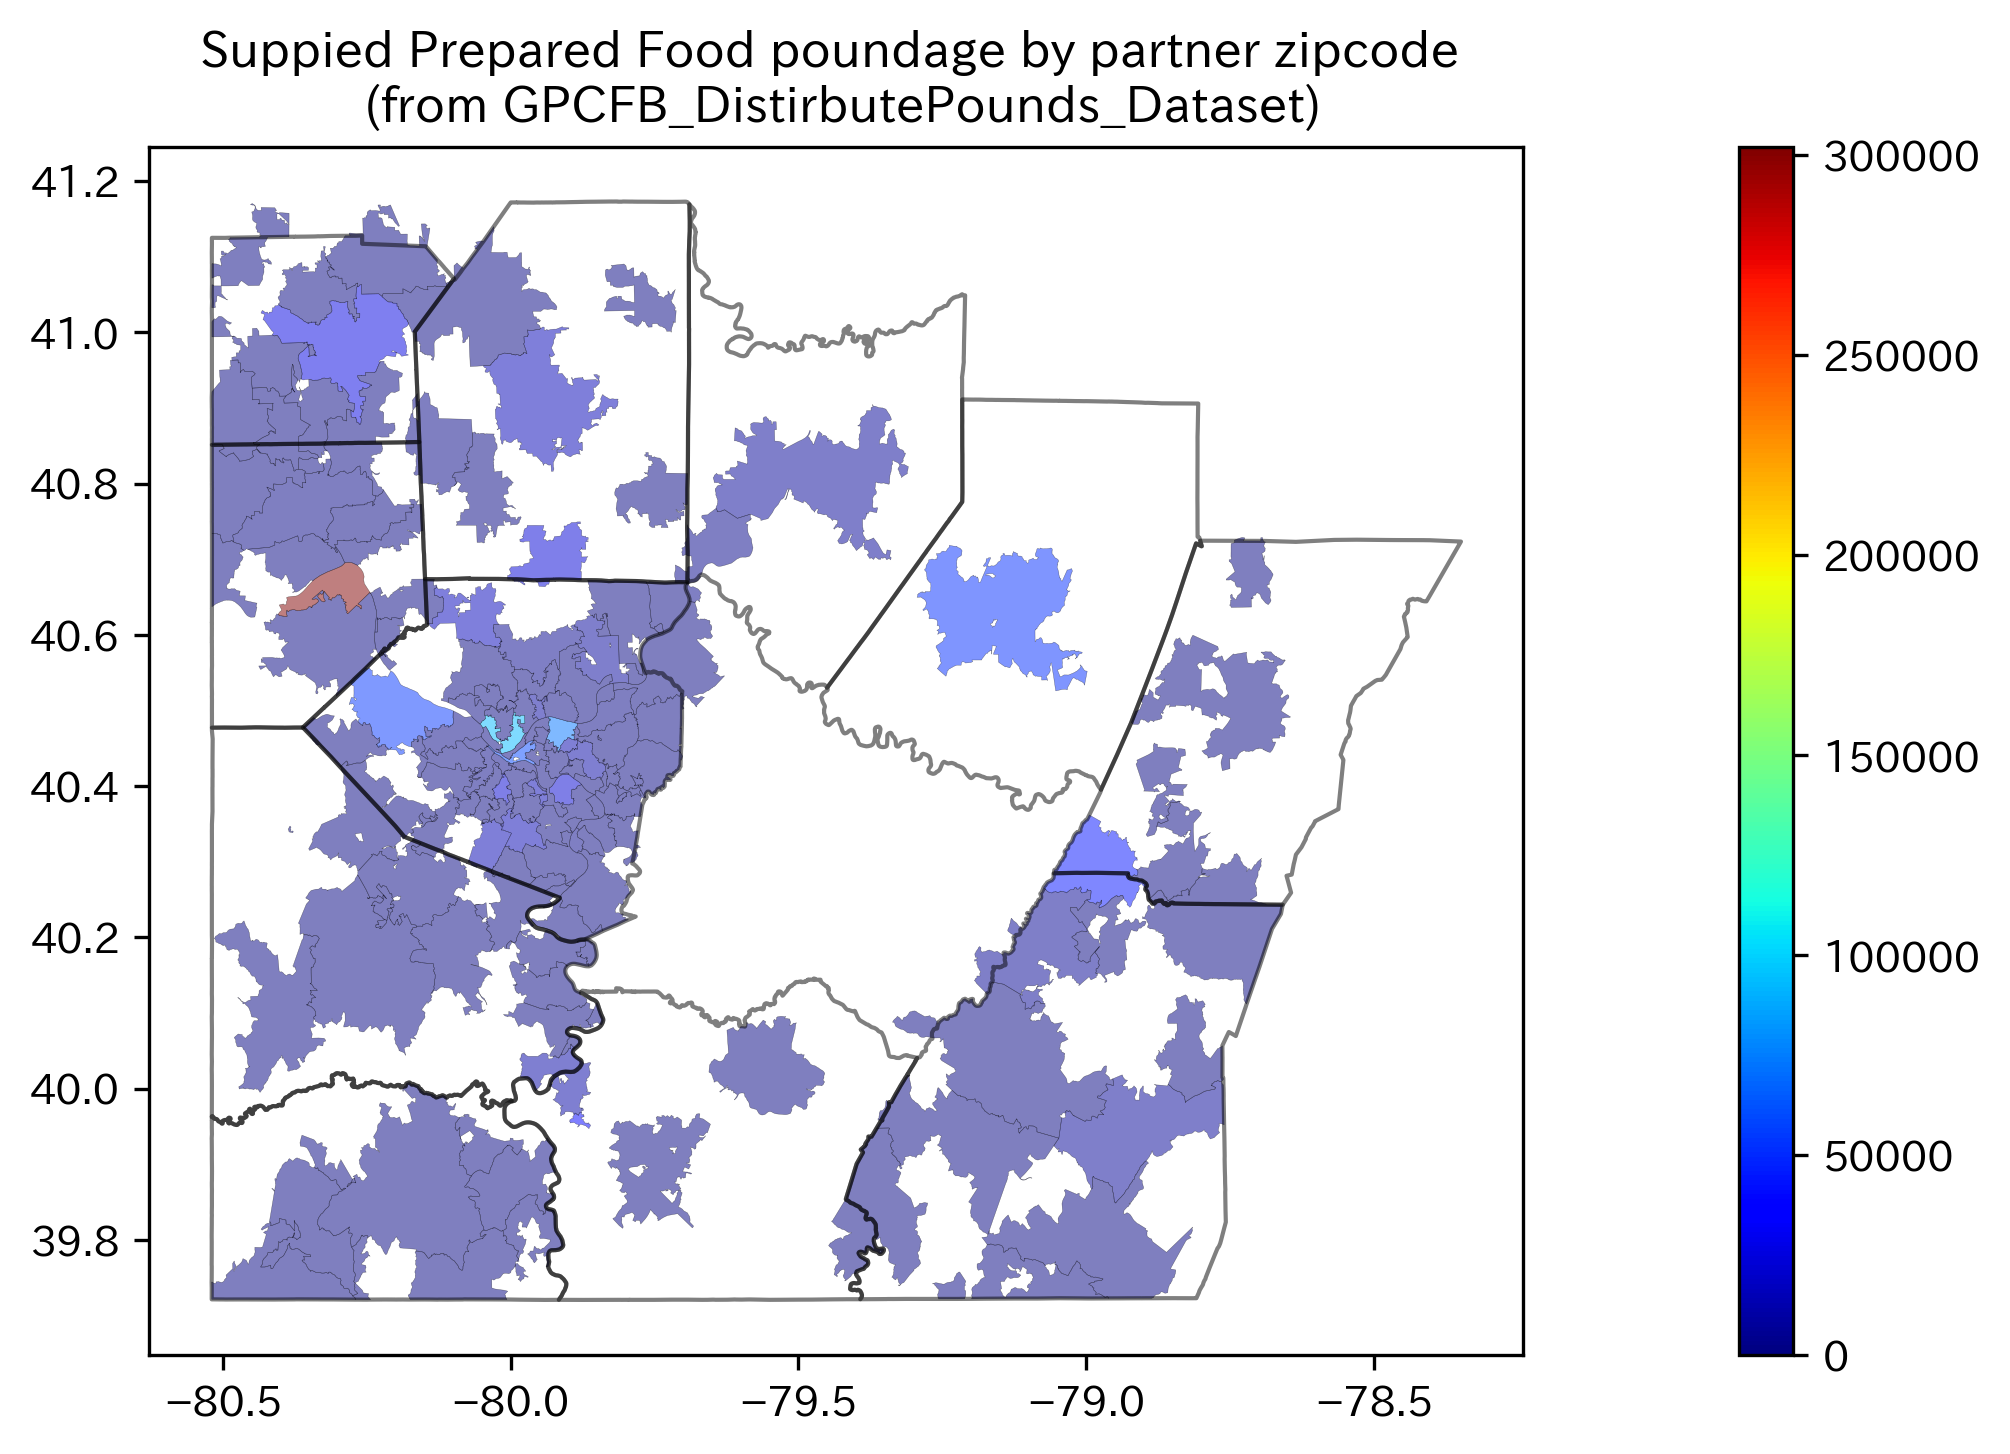

In [45]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata


# Specify the data column name that you want to visualize in color.
data = "PF_poundage"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Suppied Prepared Food poundage by partner zipcode \n (from GPCFB_DistirbutePounds_Dataset)')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap='jet', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

In [109]:
conditions = [ df_['Prepared_food'] >= 1 ]
choices = [1]

df_['Prepared_food_2'] = np.select(conditions, choices, default=0) 

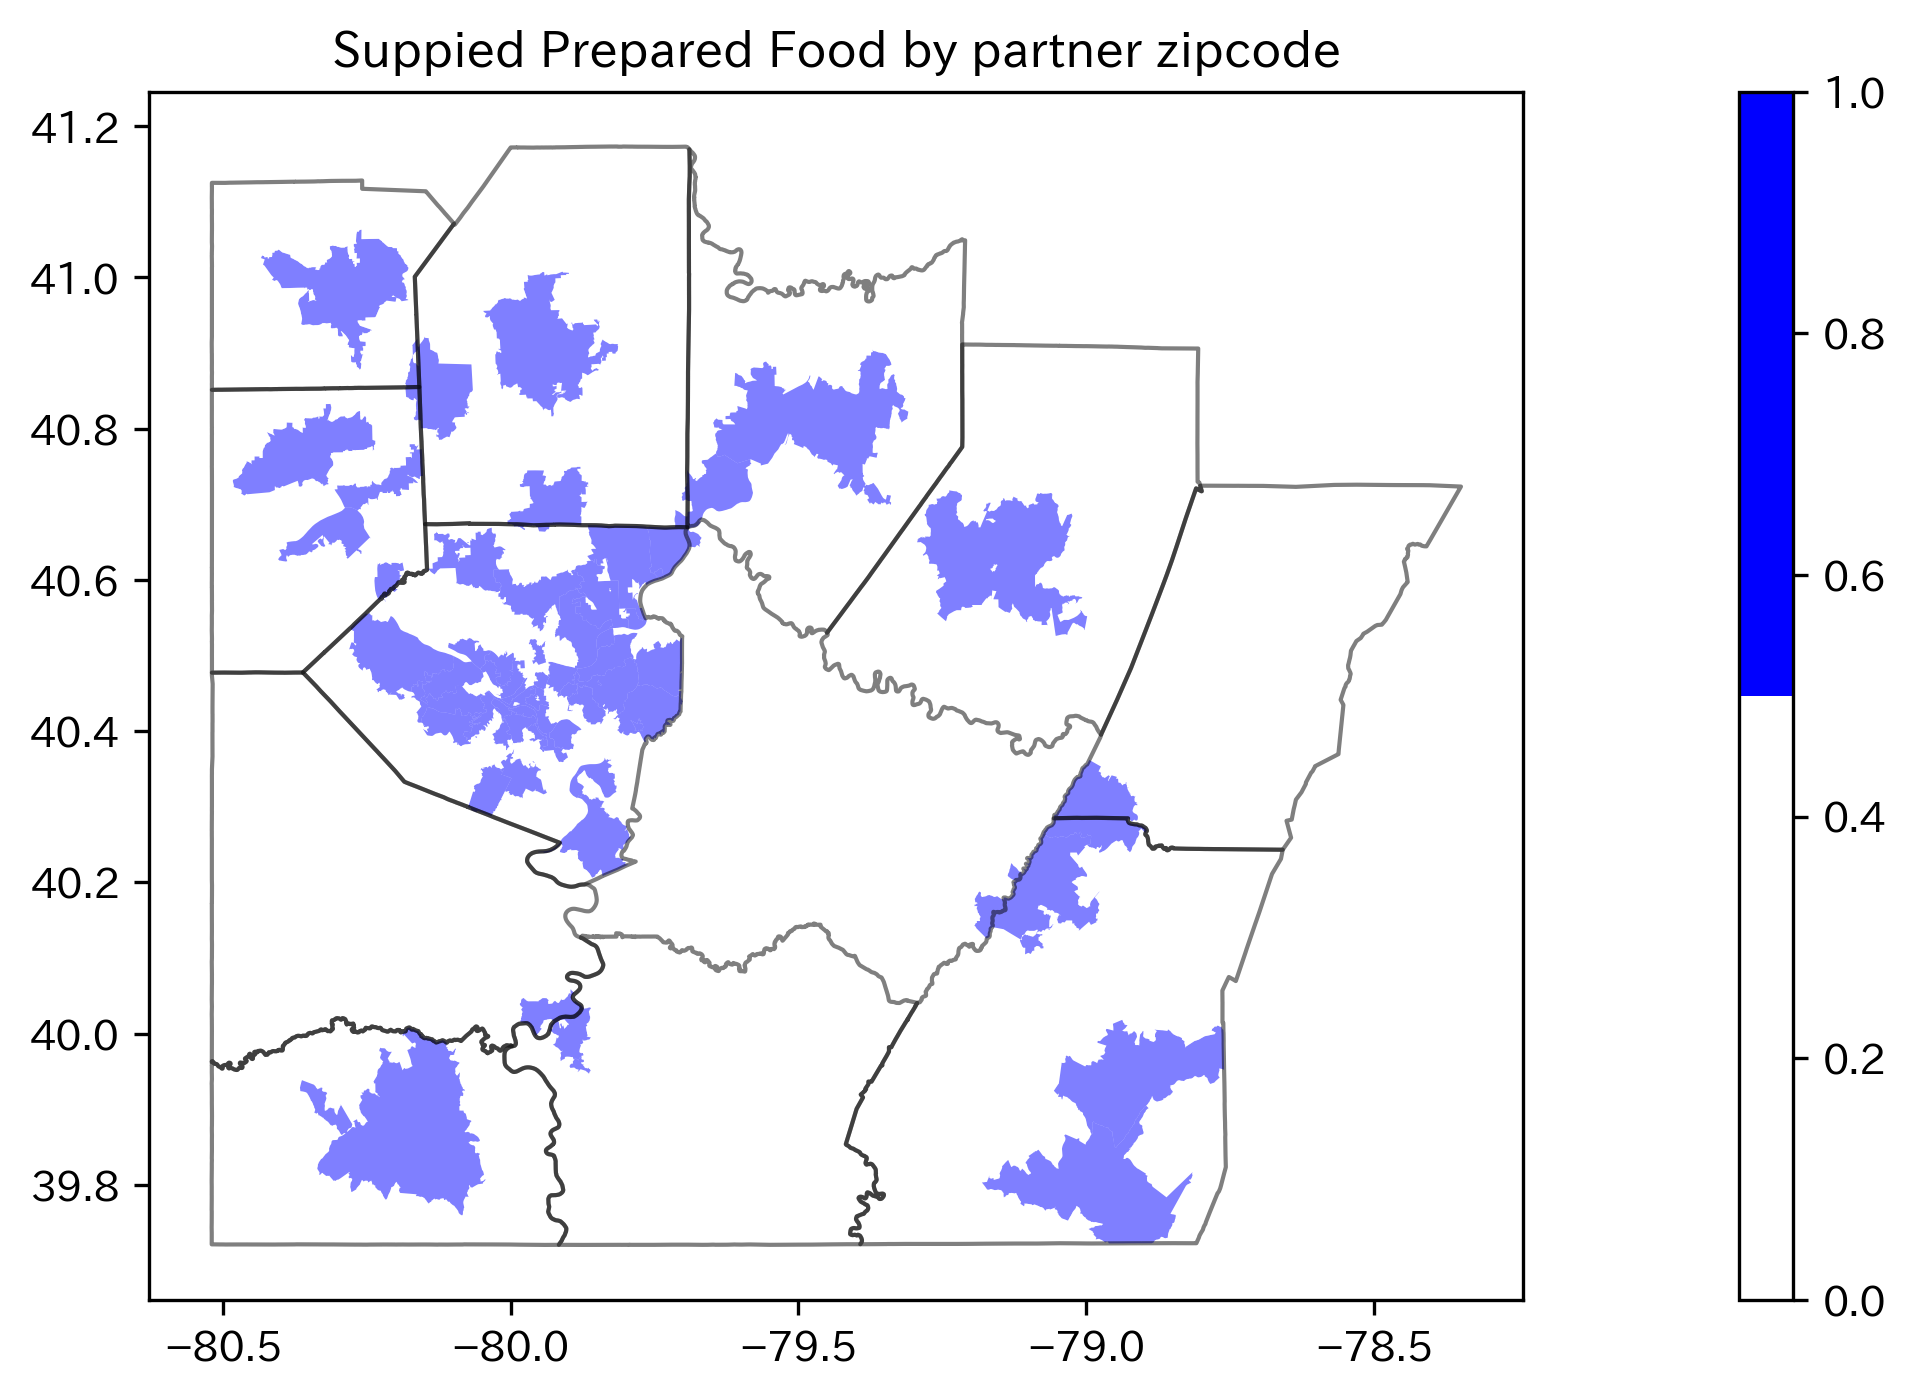

In [115]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Bicolor mapping
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white","blue"])

# Specify the data column name that you want to visualize in color.
data = "Prepared_food_2"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Suppied Prepared Food by partner zipcode')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

## Census tract -> ZIP

In [46]:
# Read census data
df_census = gpd.read_file("./data/FoodAccessResearchAtlasData2019_GpcbgArea_Population.csv") 

In [47]:
# check
df_census.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Total_Population,FI_Population,Demand_of_meals [meals/year],geometry
0,42003010300,Pennsylvania,Allegheny County,1,6600,282,1,6012,91.09,0,...,2,13,110,161,97,100,4221,0,0,None
1,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,2,8,162,119,805,248,4874,0,0,None
2,42003020300,Pennsylvania,Allegheny County,1,616,403,0,0,0,0,...,0,1,14,10,74,0,315,0,0,None
3,42003030500,Pennsylvania,Allegheny County,1,2256,1154,0,116,5.14,0,...,0,7,57,32,470,469,2693,0,0,None
4,42003040200,Pennsylvania,Allegheny County,1,2604,594,0,1259,48.35,0,...,0,7,52,61,254,224,2242,0,0,None


In [49]:
# Data for convert
df_cen_zip = pd.read_csv("./geo_data/ZIP_TRACT_122021.csv") 

In [50]:
df_cen_zip.head()

,zip,tract,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,15139,42003526101,OAKMONT,PA,0.000000,0.005587,0.000000,0.000469
1,15139,42003525100,OAKMONT,PA,0.288441,0.041899,0.050420,0.254456
2,15139,42003525300,OAKMONT,PA,0.274537,0.256983,0.172269,0.267355
3,15139,42003525200,OAKMONT,PA,0.437023,0.695531,0.777311,0.477720
4,15222,42003020300,PITTSBURGH,PA,0.293614,0.160600,0.299424,0.243931


In [59]:
print(df_cen_zip["tract"].dtypes)
print(df_census["CensusTract"].dtypes)

int64
int64


In [58]:
# change dtype
df_census = df_census.astype({'CensusTract': int})

In [60]:
# merge, key=CensusTract
df_census = pd.merge(df_census, df_cen_zip, left_on='CensusTract', right_on='tract')

In [61]:
df_census.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,Demand_of_meals [meals/year],geometry,zip,tract,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,42003010300,Pennsylvania,Allegheny County,1,6600,282,1,6012,91.09,0,...,0,None,15219,42003010300,PITTSBURGH,PA,0.102612,0.101715,0.100457,0.102189
1,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,0,None,15222,42003020100,PITTSBURGH,PA,0.688431,0.829306,0.681382,0.740996
2,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,0,None,15272,42003020100,PITTSBURGH,PA,0.000000,1.000000,0.000000,1.000000
3,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,0,None,15262,42003020100,PITTSBURGH,PA,0.000000,0.000000,1.000000,1.000000
4,42003020100,Pennsylvania,Allegheny County,1,3629,1906,0,1091,30.06,0,...,0,None,15259,42003020100,PITTSBURGH,PA,0.000000,0.000000,1.000000,1.000000


In [64]:
list(df_census)

['CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuartersFlag',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts_1And10',
 'LILATracts_halfAnd10',
 'LILATracts_1And20',
 'LILATracts_Vehicle',
 'HUNVFlag',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LA1and10',
 'LAhalfand10',
 'LA1and20',
 'LATracts_half',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVehicle_20',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lapop1',
 'lapop1share',
 

In [65]:
# change dtype
df_census = df_census.astype({'LILATracts_1And10': int})
df_census = df_census.astype({'Total_Population': int})
df_census = df_census.astype({'FI_Population': int})
df_census = df_census.astype({'Demand_of_meals [meals/year]': int})

In [82]:
# group zy zip
df_2 = df_census.groupby('zip').sum()

In [83]:
# bit が重なったところを直す。
conditions = [ df_2['LILATracts_1And10'] >= 1 ]
choices = [1]

df_2['LILATracts_1And10'] = np.select(conditions, choices, default=0) 

In [84]:
df_2

,CensusTract,LILATracts_1And10,Total_Population,FI_Population,Demand_of_meals [meals/year],tract,res_ratio,bus_ratio,oth_ratio,tot_ratio
zip,,,,,,,,,,
15001,588102307708,1,51540,7190,7873050,588102307708,1.000000,1.000000,1.0,1.000000
15003,336048354003,1,18641,7769,8507055,336048354003,1.000000,1.000000,1.0,1.000000
15004,42125713700,0,4567,0,0,42125713700,0.000000,0.000000,1.0,1.000000
15005,294049031806,0,30185,0,0,294049031806,1.000000,1.000000,1.0,1.000000
15006,42003407002,0,6883,0,0,42003407002,0.000000,0.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...
16641,84042024500,0,7842,0,0,84042024500,0.955153,0.966667,1.0,0.956713
16644,42021012100,0,2577,0,0,42021012100,0.000000,1.000000,1.0,1.000000
16646,84042023800,1,10810,4373,4788435,84042023800,0.978723,1.000000,1.0,0.988403


In [78]:
df_2 = pd.merge(df_2, df_geo[["ZCTA5CE20", "geometry"]], left_on="zip", right_on="ZCTA5CE20")

In [79]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_2, geometry='geometry') 

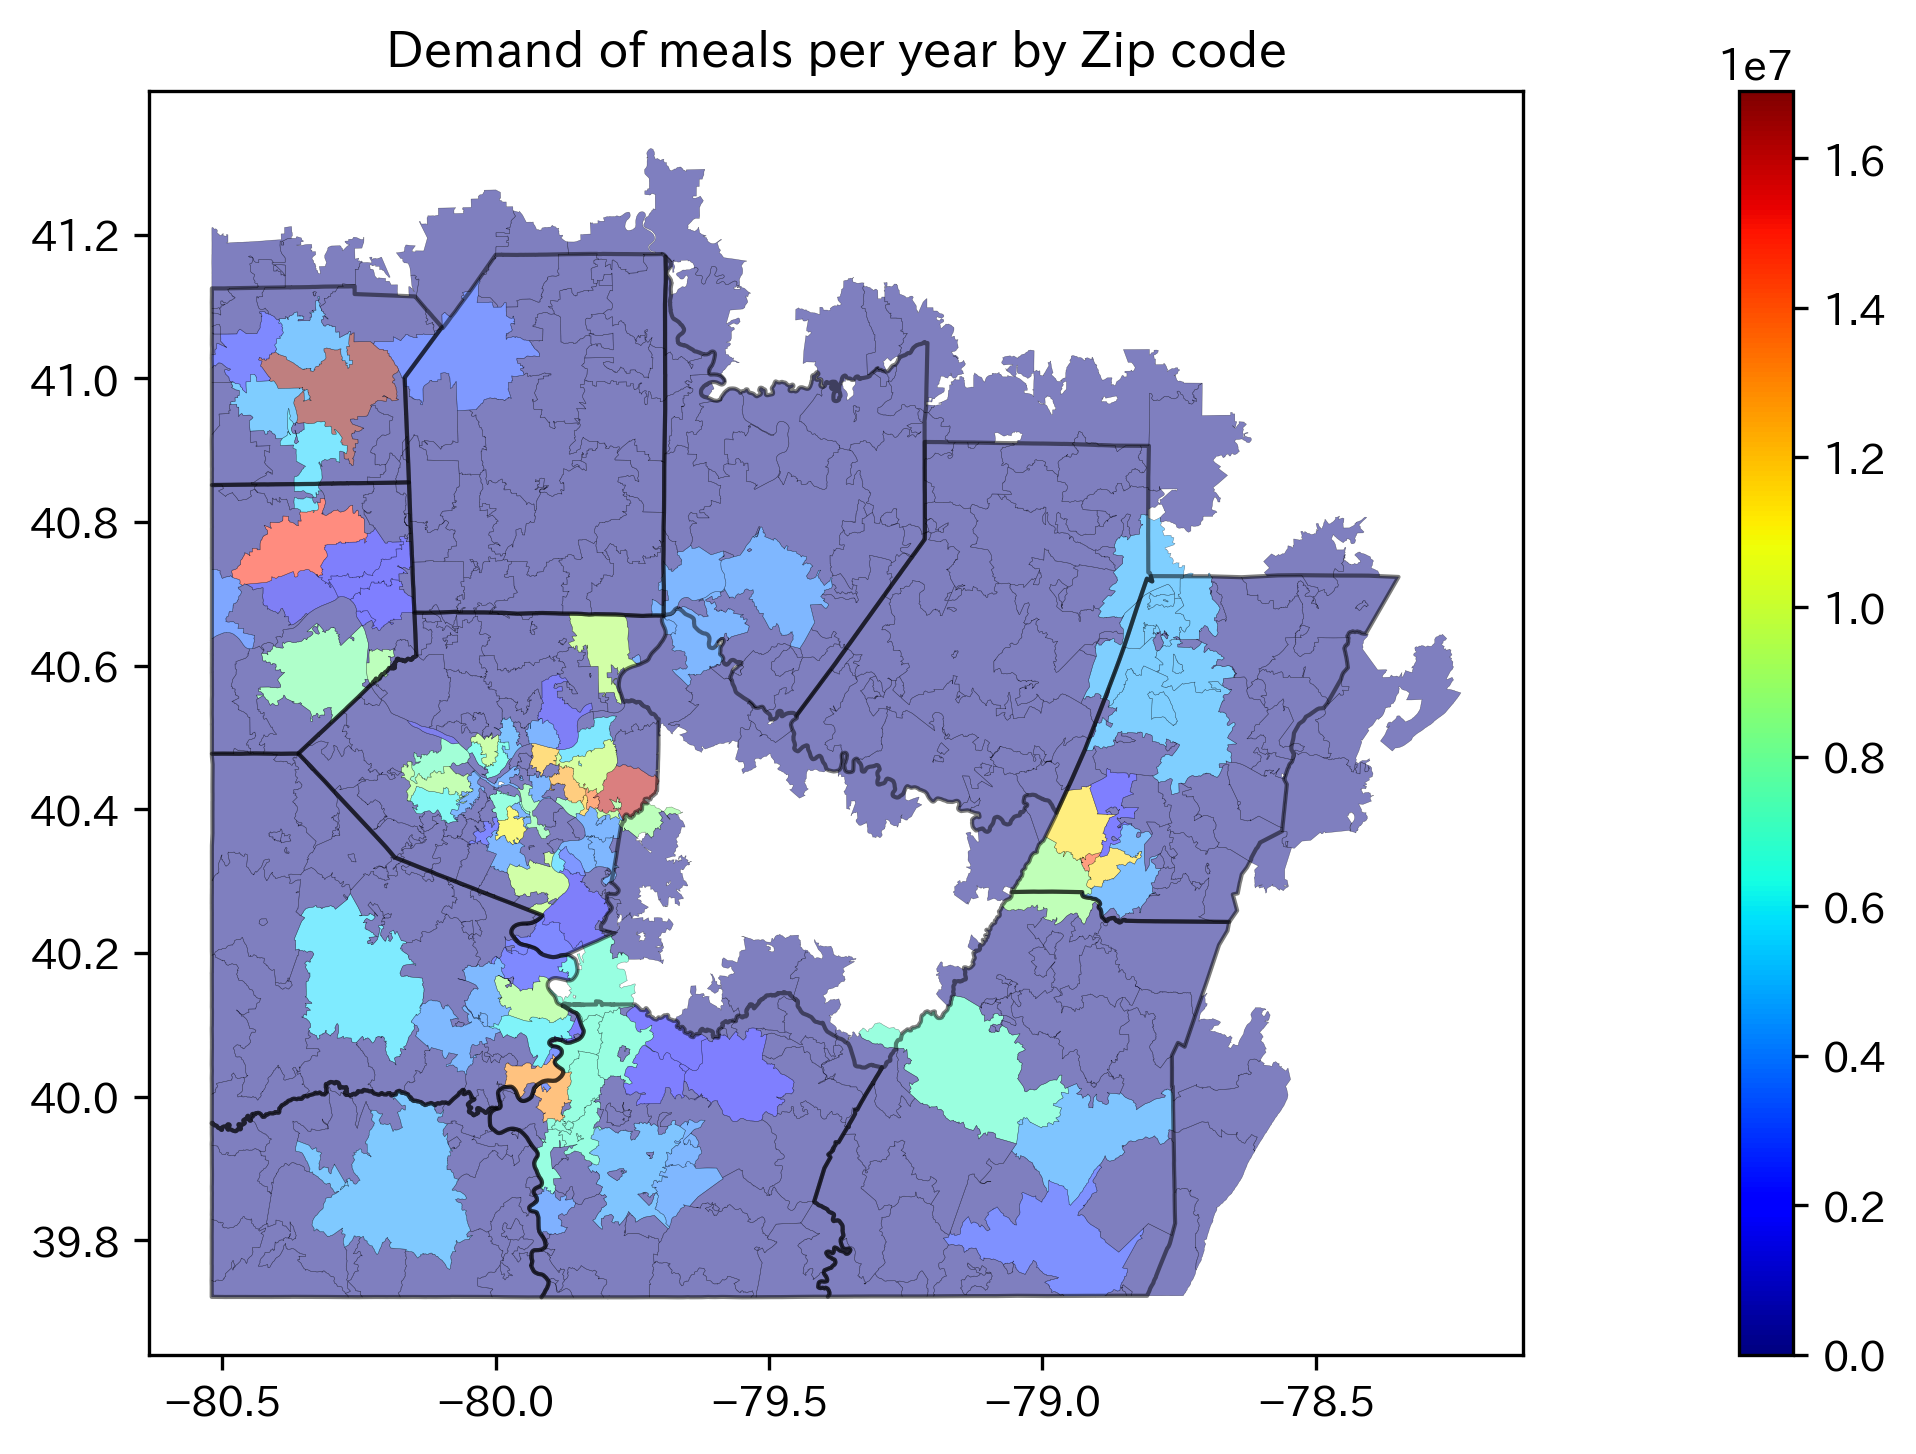

In [71]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata


# Specify the data column name that you want to visualize in color.
data = "Demand_of_meals [meals/year]"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Demand of meals per year by Zip code')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap='jet', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

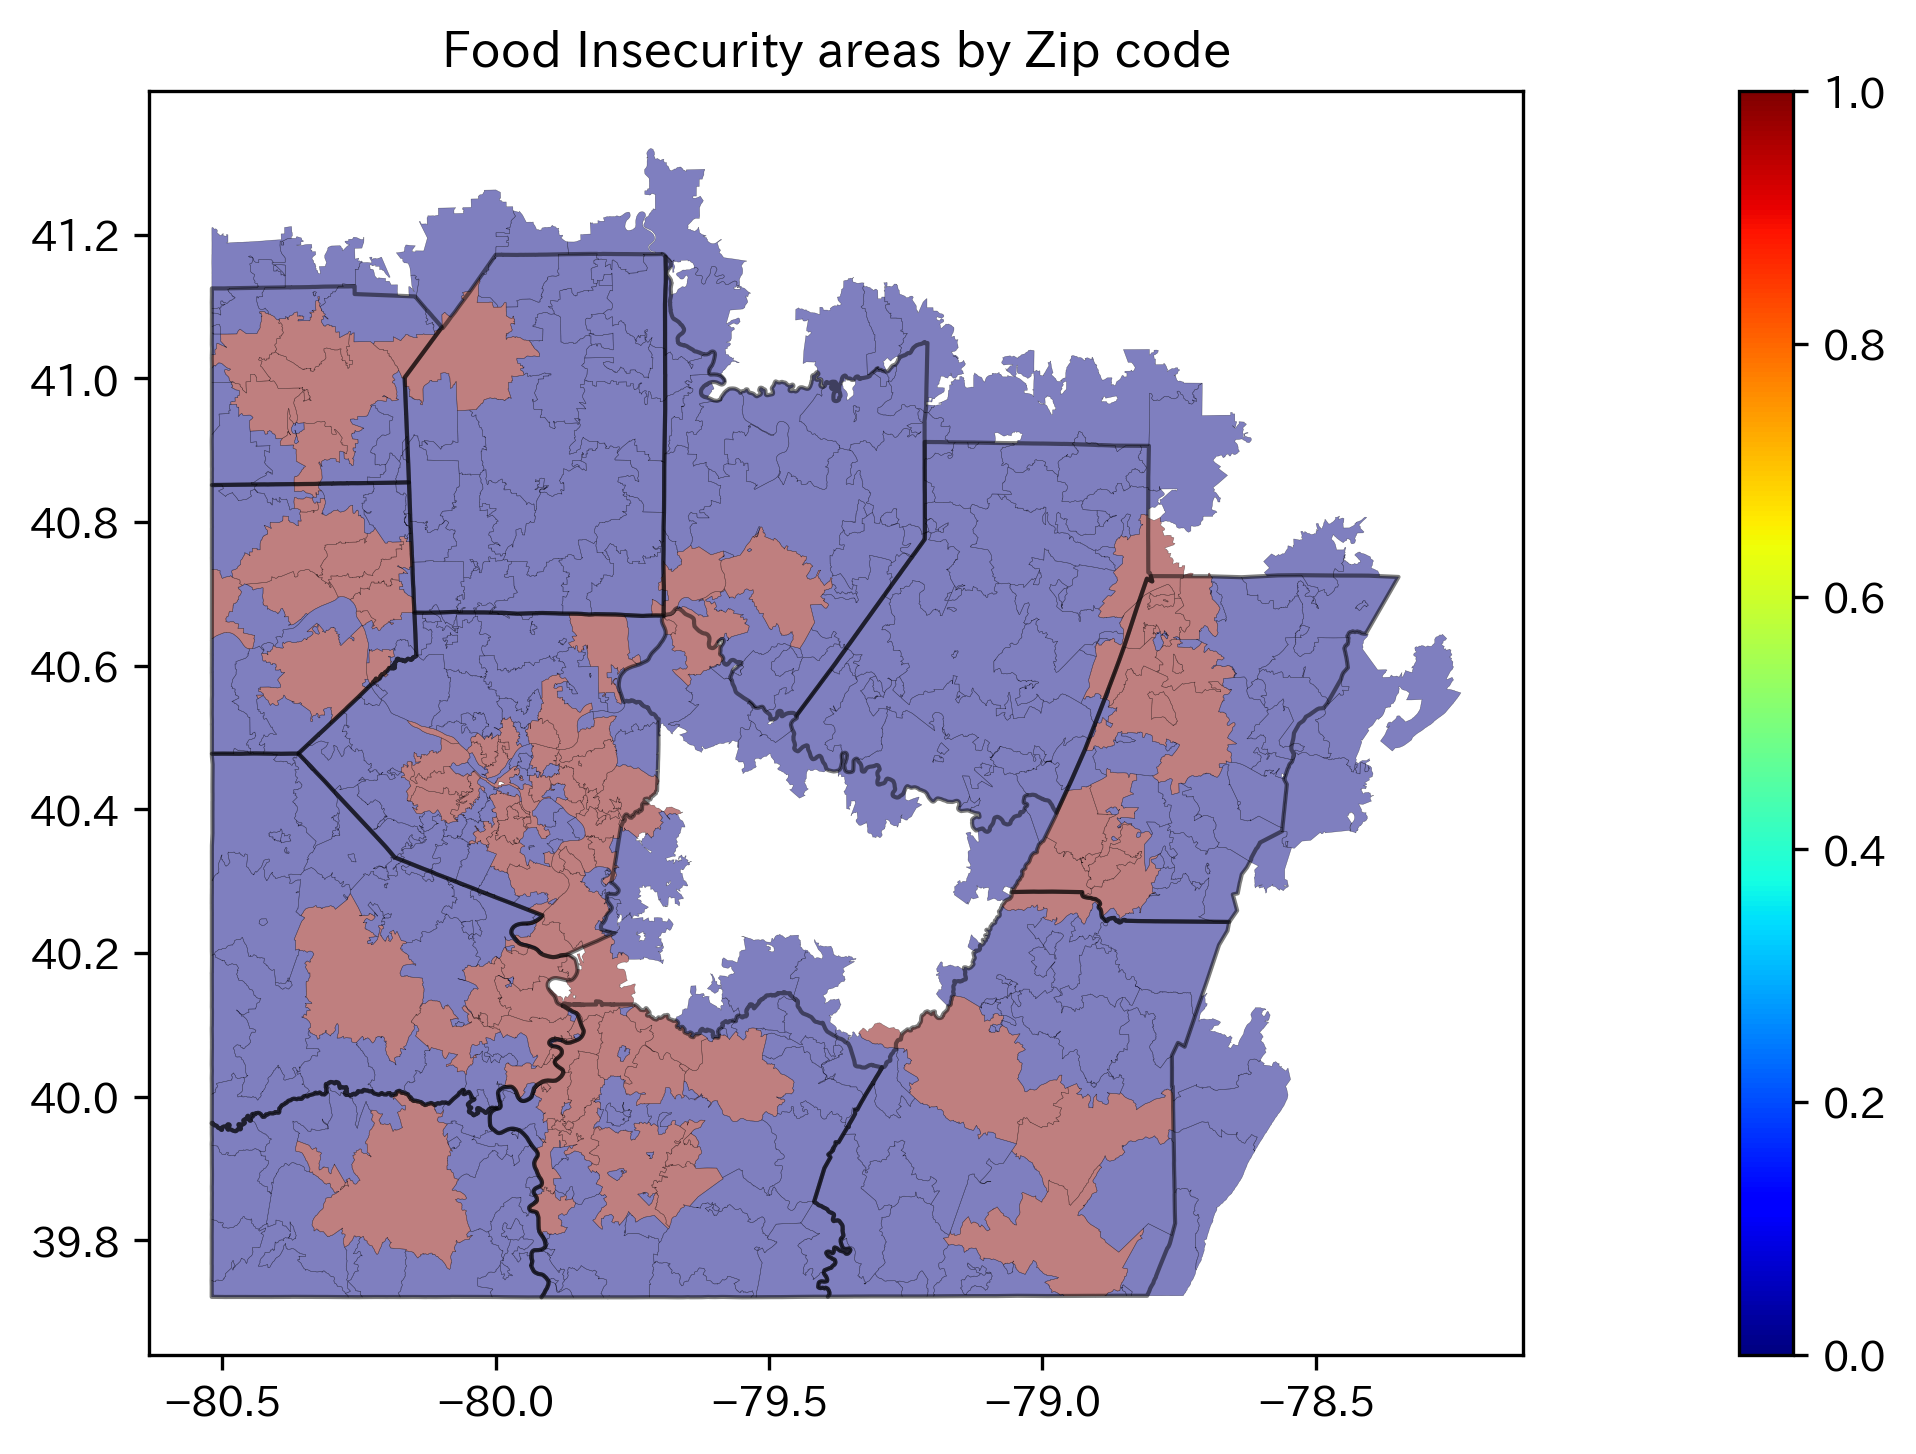

In [80]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata


# Specify the data column name that you want to visualize in color.
data = "LILATracts_1And10"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Food Insecurity areas by Zip code')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap='jet', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

## 需要と供給のデータをマージする
- Demand: df_2["LILATracts_1And10"]
- Supply: df_['Prepared_food']

In [86]:
df_3 = pd.merge(df_, df_2, left_on="zipcode", right_on="zip")

In [87]:
df_3.head()

,ProductWeight,Prepared_food,PF_poundage,zipcode,geometry,CensusTract,LILATracts_1And10,Total_Population,FI_Population,Demand_of_meals [meals/year],tract,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,872481.537,0,0.0,15001,"POLYGON ((-80.43758 40.55899, -80.43504 40.559...",588102307708,1,51540,7190,7873050,588102307708,1.0,1.0,1.0,1.0
1,724792.407,17,612.0,15003,"POLYGON ((-80.23625 40.60162, -80.23618 40.602...",336048354003,1,18641,7769,8507055,336048354003,1.0,1.0,1.0,1.0
2,68269.286,0,0.0,15004,"POLYGON ((-80.38656 40.34317, -80.38655 40.343...",42125713700,0,4567,0,0,42125713700,0.0,0.0,1.0,1.0
3,4195.202,0,0.0,15005,"POLYGON ((-80.24356 40.65536, -80.24147 40.656...",294049031806,0,30185,0,0,294049031806,1.0,1.0,1.0,1.0
4,18560.157,0,0.0,15009,"POLYGON ((-80.45619 40.71337, -80.44486 40.714...",420076024508,1,33676,1480,1620600,420076024508,1.0,1.0,1.0,1.0


In [88]:
# Identify Non Prepared Food and Food Insecurity Area

conditions = [ (df_3['Prepared_food'] == 0) & (df_3["LILATracts_1And10"] == 1) ]
choices = [1]

df_3['nonPF_and_FI'] = np.select(conditions, choices, default=0) 


In [90]:
list(df_3)

['ProductWeight',
 'Prepared_food',
 'PF_poundage',
 'zipcode',
 'geometry',
 'CensusTract',
 'LILATracts_1And10',
 'Total_Population',
 'FI_Population',
 'Demand_of_meals [meals/year]',
 'tract',
 'res_ratio',
 'bus_ratio',
 'oth_ratio',
 'tot_ratio',
 'nonPF_and_FI']

In [91]:
df_3 = pd.merge(df_3, df_geo[["ZCTA5CE20", "geometry"]], left_on="zipcode", right_on="ZCTA5CE20")

In [93]:
df_3.head()

,ProductWeight,Prepared_food,PF_poundage,zipcode,geometry_x,CensusTract,LILATracts_1And10,Total_Population,FI_Population,Demand_of_meals [meals/year],tract,res_ratio,bus_ratio,oth_ratio,tot_ratio,nonPF_and_FI,ZCTA5CE20,geometry_y
0,872481.537,0,0.0,15001,"POLYGON ((-80.43758 40.55899, -80.43504 40.559...",588102307708,1,51540,7190,7873050,588102307708,1.0,1.0,1.0,1.0,1,15001,"POLYGON ((-80.43758 40.55899, -80.43504 40.559..."
1,724792.407,17,612.0,15003,"POLYGON ((-80.23625 40.60162, -80.23618 40.602...",336048354003,1,18641,7769,8507055,336048354003,1.0,1.0,1.0,1.0,0,15003,"POLYGON ((-80.23625 40.60162, -80.23618 40.602..."
2,68269.286,0,0.0,15004,"POLYGON ((-80.38656 40.34317, -80.38655 40.343...",42125713700,0,4567,0,0,42125713700,0.0,0.0,1.0,1.0,0,15004,"POLYGON ((-80.38656 40.34317, -80.38655 40.343..."
3,4195.202,0,0.0,15005,"POLYGON ((-80.24356 40.65536, -80.24147 40.656...",294049031806,0,30185,0,0,294049031806,1.0,1.0,1.0,1.0,0,15005,"POLYGON ((-80.24356 40.65536, -80.24147 40.656..."
4,18560.157,0,0.0,15009,"POLYGON ((-80.45619 40.71337, -80.44486 40.714...",420076024508,1,33676,1480,1620600,420076024508,1.0,1.0,1.0,1.0,1,15009,"POLYGON ((-80.45619 40.71337, -80.44486 40.714..."


In [94]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_3, geometry='geometry_y') 

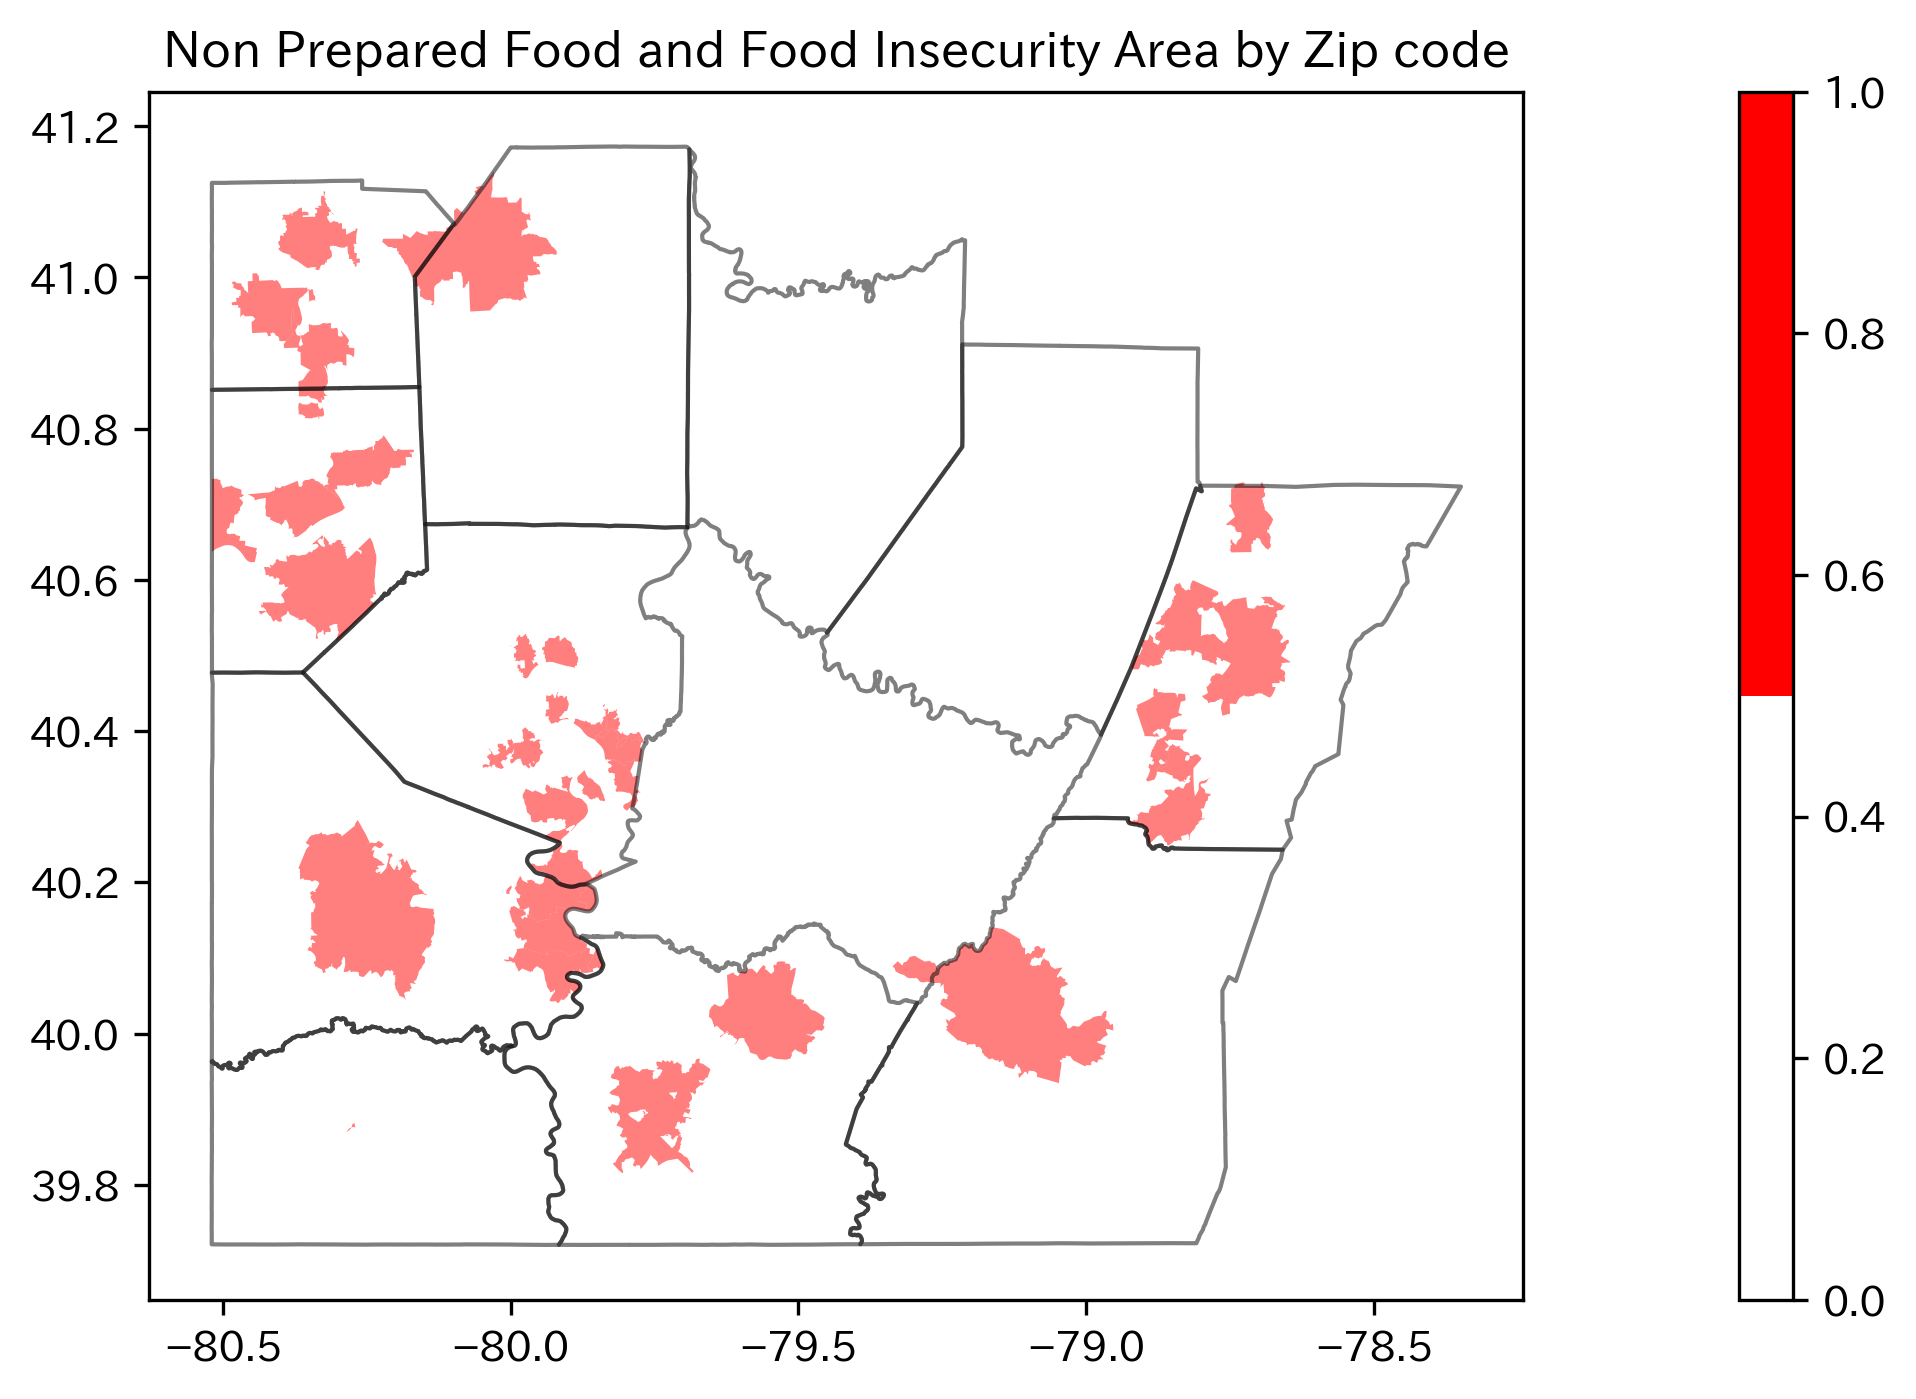

In [103]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Bicolor mapping
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["white","red"])

# Specify the data column name that you want to visualize in color.
data = "nonPF_and_FI"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Non Prepared Food and Food Insecurity Area by Zip code')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0, alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0) #line 0.1 -> 0
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)

plt.show()

In [104]:
df_3.head()

,ProductWeight,Prepared_food,PF_poundage,zipcode,geometry_x,CensusTract,LILATracts_1And10,Total_Population,FI_Population,Demand_of_meals [meals/year],tract,res_ratio,bus_ratio,oth_ratio,tot_ratio,nonPF_and_FI,ZCTA5CE20,geometry_y
0,872481.537,0,0.0,15001,"POLYGON ((-80.43758 40.55899, -80.43504 40.559...",588102307708,1,51540,7190,7873050,588102307708,1.0,1.0,1.0,1.0,1,15001,"POLYGON ((-80.43758 40.55899, -80.43504 40.559..."
1,724792.407,17,612.0,15003,"POLYGON ((-80.23625 40.60162, -80.23618 40.602...",336048354003,1,18641,7769,8507055,336048354003,1.0,1.0,1.0,1.0,0,15003,"POLYGON ((-80.23625 40.60162, -80.23618 40.602..."
2,68269.286,0,0.0,15004,"POLYGON ((-80.38656 40.34317, -80.38655 40.343...",42125713700,0,4567,0,0,42125713700,0.0,0.0,1.0,1.0,0,15004,"POLYGON ((-80.38656 40.34317, -80.38655 40.343..."
3,4195.202,0,0.0,15005,"POLYGON ((-80.24356 40.65536, -80.24147 40.656...",294049031806,0,30185,0,0,294049031806,1.0,1.0,1.0,1.0,0,15005,"POLYGON ((-80.24356 40.65536, -80.24147 40.656..."
4,18560.157,0,0.0,15009,"POLYGON ((-80.45619 40.71337, -80.44486 40.714...",420076024508,1,33676,1480,1620600,420076024508,1.0,1.0,1.0,1.0,1,15009,"POLYGON ((-80.45619 40.71337, -80.44486 40.714..."


In [105]:
df_3.to_csv("nonPF_and_FI.csv")